<a href="https://colab.research.google.com/github/ABDULHAI10/House-Price-EDA-Colab/blob/main/EDA_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Step 01 Data Load

In [10]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
missing_values = df.isnull().sum()

In [12]:
missing_values

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [13]:
df.shape

(1460, 81)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
df.duplicated().sum()


np.int64(0)

#Step 02 Missing Values

In [22]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [23]:
df.isnull().sum().sum()

np.int64(7829)

In [25]:
missing = df.isnull().sum()

In [26]:
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


# Drop Missing Values

In [29]:
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [35]:
df.columns
df.columns[df.isnull().any()]


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [38]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [39]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
MasVnrType,872
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageCond,81
GarageQual,81
GarageFinish,81
BsmtFinType2,38
BsmtExposure,38
BsmtCond,37


In [42]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)

In [48]:
# 2. Fill numeric columns with median or 0
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


/tmp/ipython-input-48-4265710322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


In [49]:
# 3. Garage-related columns — fill 'None' or 0 depending on type
garage_cols = ['GarageYrBlt', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']
for col in garage_cols:
    if df[col].dtype == 'O':
        df[col].fillna('None', inplace=True)
    else:
        df[col].fillna(0, inplace=True)

/tmp/ipython-input-49-878047582.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
/tmp/ipython-input-49-878047582.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [50]:
df.isnull().sum().sort_values(ascending=False).head()


,0
BsmtQual,37
BsmtFinType1,37
MasVnrArea,8
Electrical,1
LotArea,0


In [51]:
# Clean all remaining missing columns together

df['BsmtQual'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


/tmp/ipython-input-51-2104717956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna('None', inplace=True)
/tmp/ipython-input-51-2104717956.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [53]:
df['BsmtQual'].fillna('None', inplace=True)

In [54]:
df['BsmtQual'] = df['BsmtQual'].fillna('None')


In [56]:
df['BsmtQual']     = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['MasVnrArea']   = df['MasVnrArea'].fillna(0)
df['Electrical']   = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [57]:
df.isnull().sum().sum()


np.int64(0)

#Step 3: Univariate Analysis (EDA)

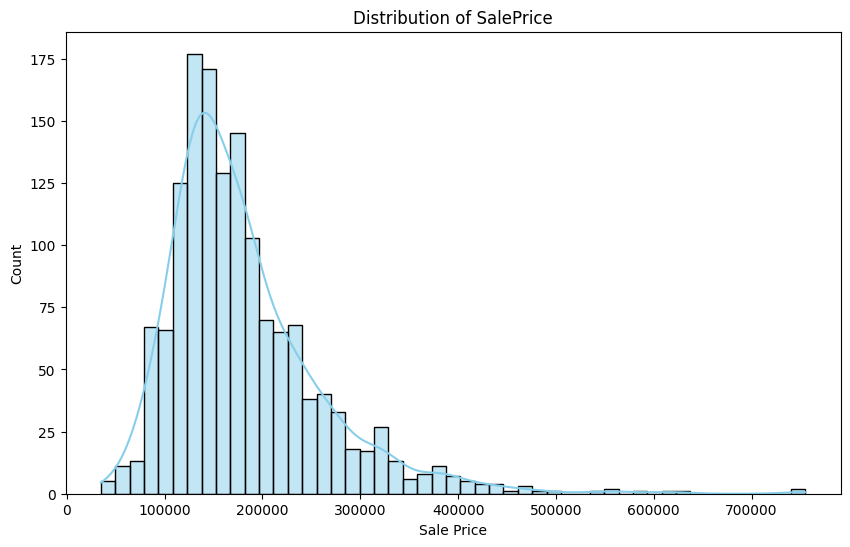

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

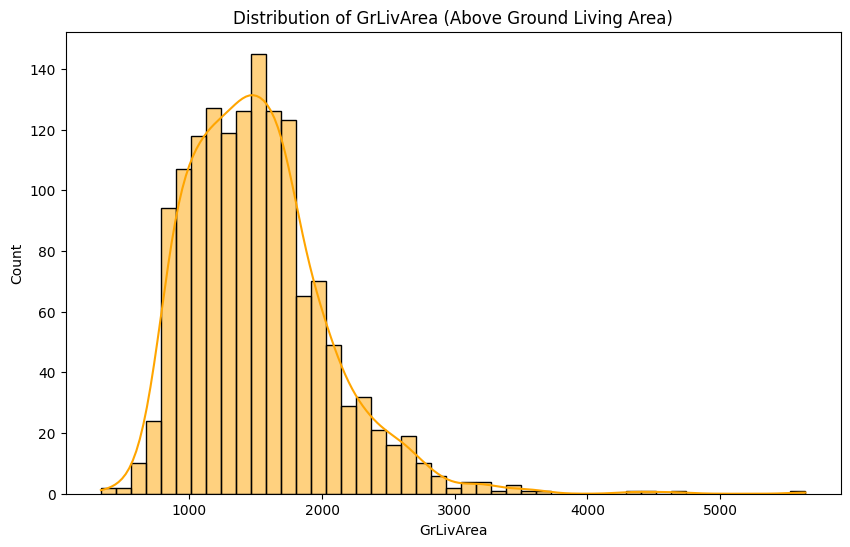

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(df['GrLivArea'], kde=True, color='orange')
plt.title('Distribution of GrLivArea (Above Ground Living Area)')
plt.xlabel('GrLivArea')
plt.ylabel('Count')
plt.show()


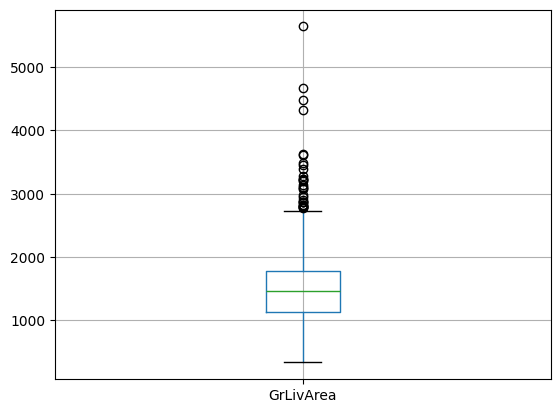

In [60]:
boxplot = df.boxplot(column=['GrLivArea'])

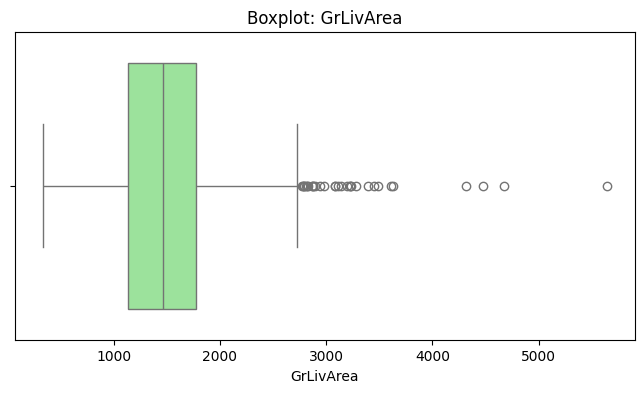

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['GrLivArea'], color='lightgreen')
plt.title('Boxplot: GrLivArea')
plt.show()


/tmp/ipython-input-64-992651195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverallQual', data=df, palette='pastel')


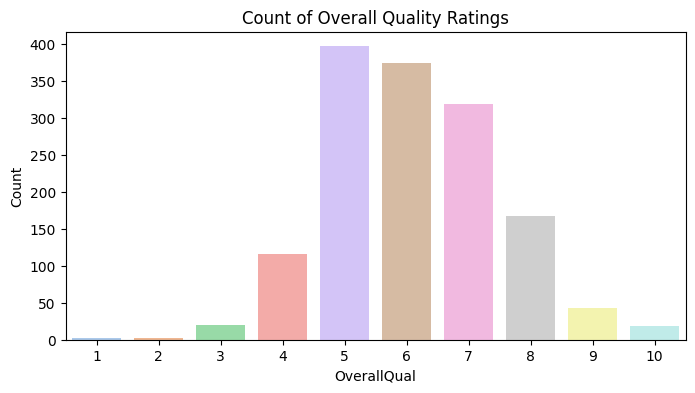

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='OverallQual', data=df, palette='pastel')
plt.title('Count of Overall Quality Ratings')
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-63-106162501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GarageCars', data=df, palette='coolwarm')


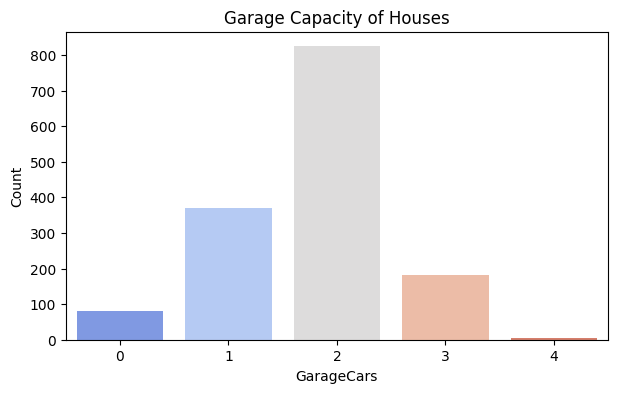

In [63]:
plt.figure(figsize=(7,4))
sns.countplot(x='GarageCars', data=df, palette='coolwarm')
plt.title('Garage Capacity of Houses')
plt.xlabel('GarageCars')
plt.ylabel('Count')
plt.show()


#Step 4: Bivariate Analysis (2 variables at a time)

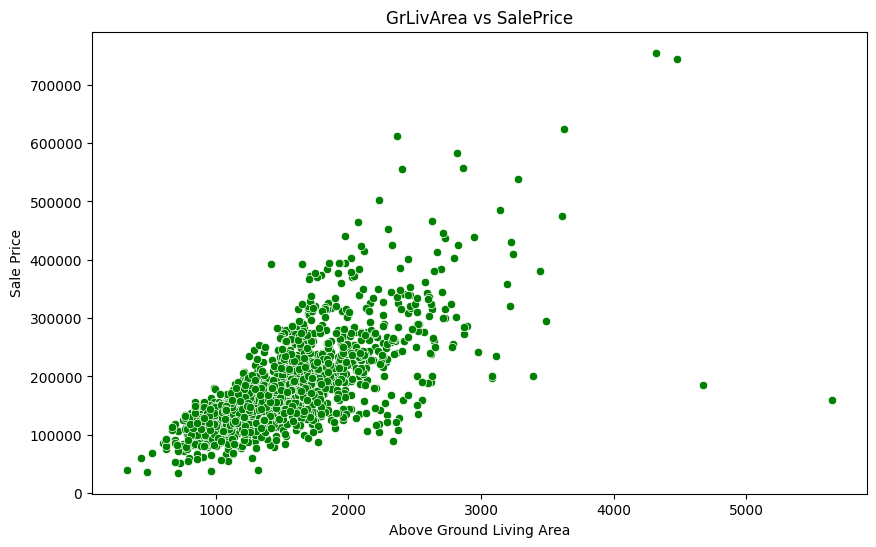

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='green')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.show()


/tmp/ipython-input-66-1920977452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='Set3')


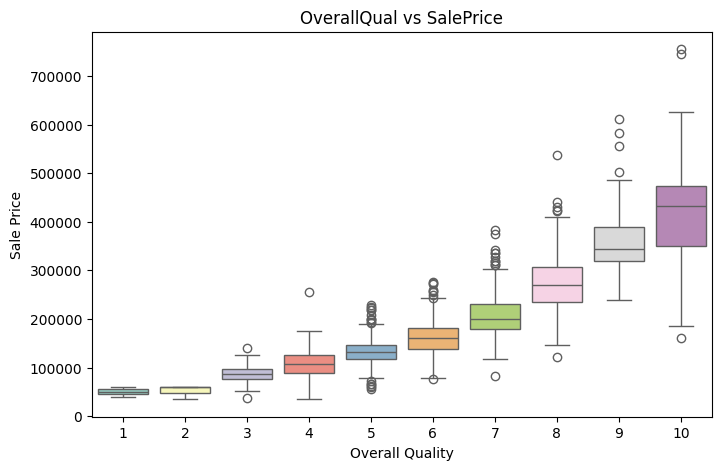

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='Set3')
plt.title('OverallQual vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


/tmp/ipython-input-67-2982813850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GarageCars', y='SalePrice', data=df, palette='coolwarm')


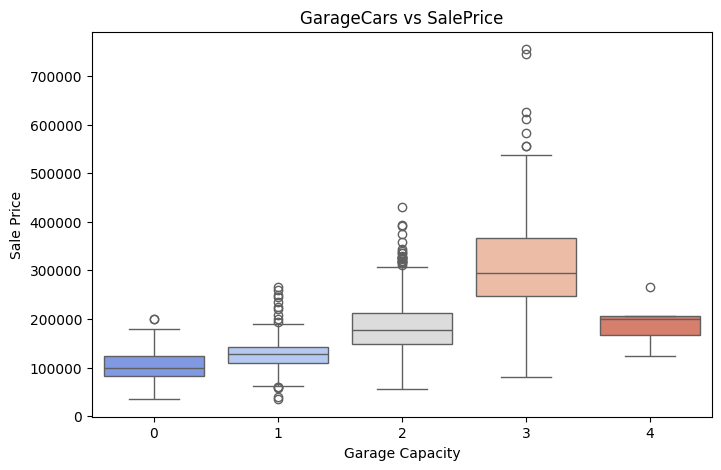

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageCars', y='SalePrice', data=df, palette='coolwarm')
plt.title('GarageCars vs SalePrice')
plt.xlabel('Garage Capacity')
plt.ylabel('Sale Price')
plt.show()


In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()
df.corr()


ValueError: could not convert string to float: 'RL'

<Figure size 1200x1000 with 0 Axes>

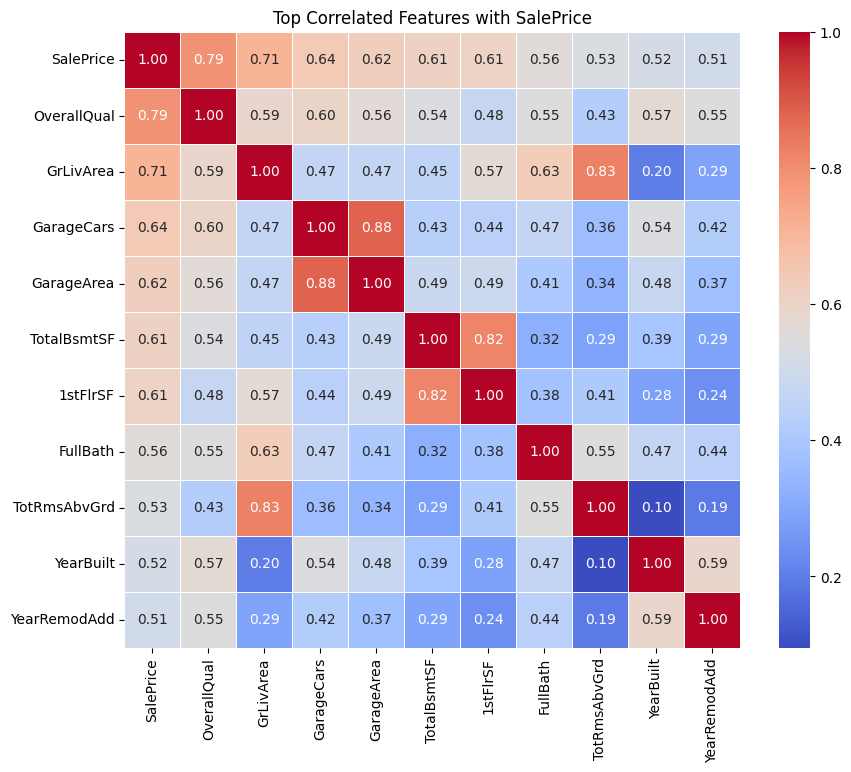

In [82]:
import numpy as np

# Step 1: Get correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Step 2: Get top 10 features most correlated with SalePrice (excluding SalePrice itself)
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Step 3: Slice correlation matrix for just those features
focused_corr = corr_matrix.loc[top_features, top_features]

# Step 4: Plot cleaner heatmap
plt.figure(figsize=(10,8))
sns.heatmap(focused_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Top Correlated Features with SalePrice')
plt.show()
